In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import func_plot as fp
import scipy.stats as ss
from statsmodels.regression.linear_model import OLS

In [2]:
mmp_fsLR = np.loadtxt('../../src/fs_LR.64k.mmp_360.txt')
ratio = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
spa = [0,1,2,99]

In [3]:
gradient = [ss.zscore(np.loadtxt('../../results/grad/group_grad_sparsity_'+str(ratio[i])+'_fsLR_mmp.txt')) for i in range(10)]
max_mode = 100

glucose_raw = np.loadtxt('../../results/glucose/mean_mmp.txt')
glucose_l = ss.zscore(glucose_raw[:180])
glucose_r = ss.zscore(glucose_raw[180:])
glucose = np.concatenate((glucose_l, glucose_r))
glucose_asy = glucose_l - glucose_r

corr_raw = np.zeros((10,max_mode))
for i in range(10):
  for j in range(max_mode):
    glm = OLS(glucose, gradient[i][:,:j+1]).fit()
    corr_raw[i,j]=glm.rsquared_adj

## Gradient permutation

In [18]:
grad_vari = ss.zscore(np.load('../../results/models/grad_group_variogram_fsLR-mmp.npy'),axis=2)
corr_vari = np.zeros((1000,max_mode))
for i in range(1000):
  for j in range(max_mode):
    glm = OLS(glucose, grad_vari[:j+1,i,:].T).fit()
    corr_vari[i,j]=glm.rsquared_adj

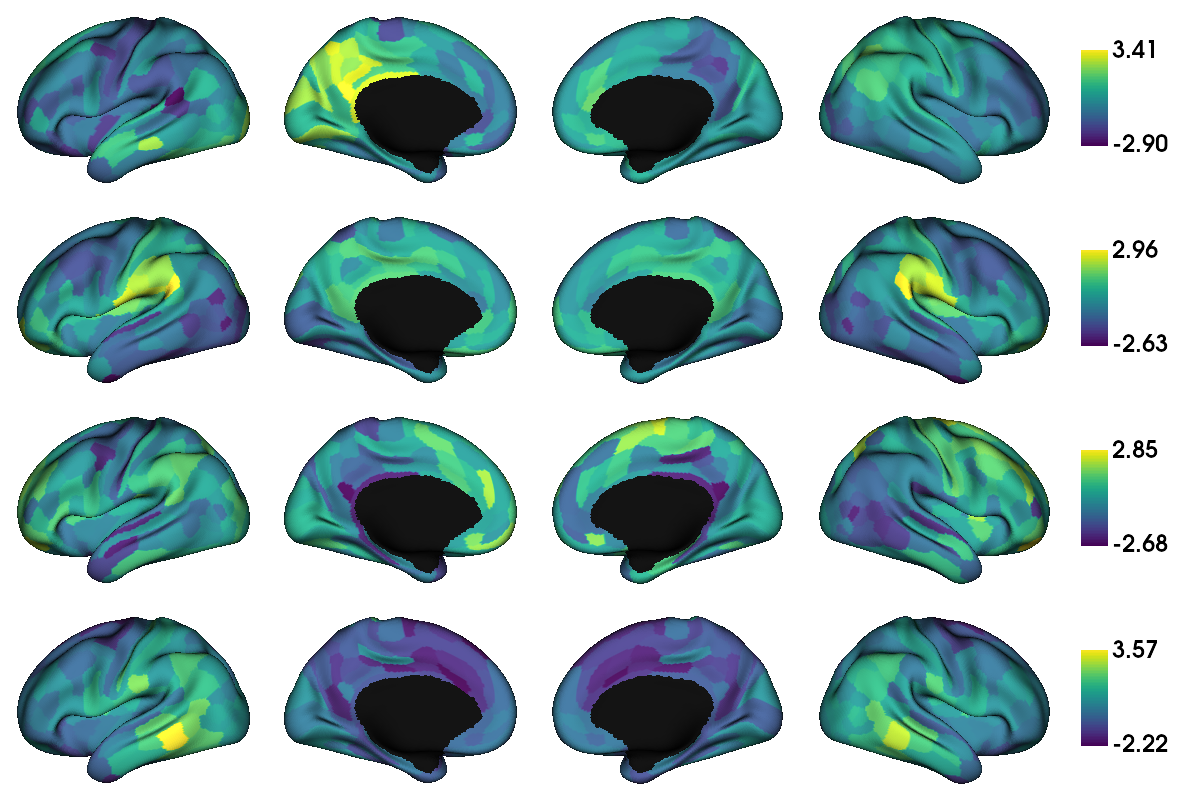

In [28]:
plot=[None]*4
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = grad_vari[0][i][node]
  plot[i][mmp_fsLR==0] = np.nan
    
fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 800),
                cmap = 'viridis', filename = '../../figures/variogram_g1_fsLR_mmp.png',
                display=True)

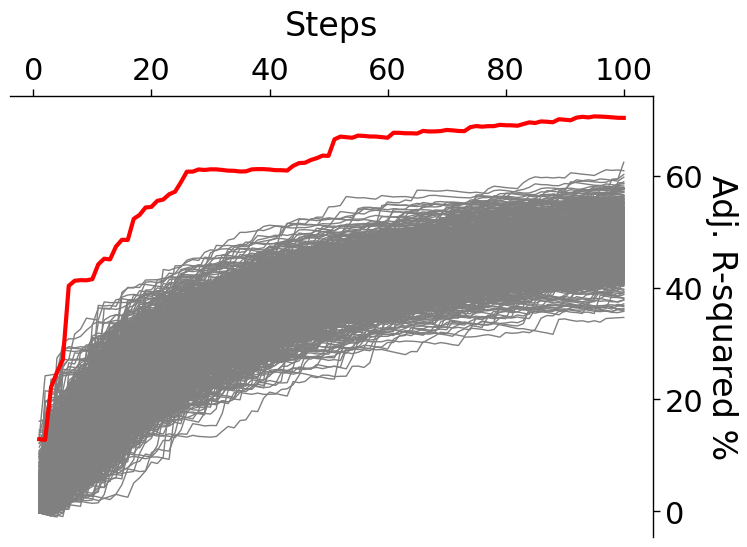

In [19]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(1000):
  ax.plot(range(1,max_mode+1), corr_vari[i]*100, lw=1, color='gray')

#actual model
ax.plot(range(1,max_mode+1), corr_raw[9]*100, lw=3, color='red')

ax.set_xlabel('Steps', labelpad=15)
ax.set_ylabel('Adj. R-squared %', rotation=270, labelpad=25)
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
ax.yaxis.tick_right()
ax.set_xticks([0,20,40,60,80,100])
ax.xaxis.tick_top()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/grad_variogram_fitting_fsLR_mmp.png', transparent=True, dpi=300)

## Glucose permutation

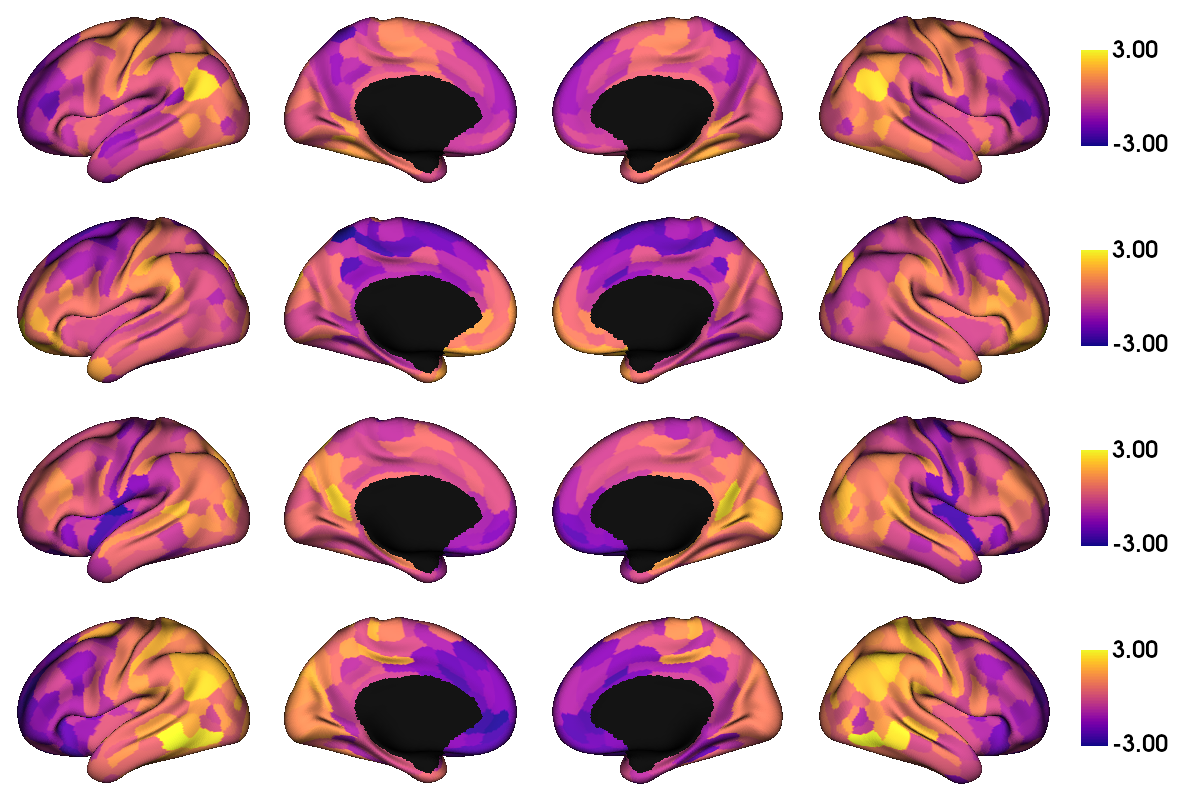

In [20]:
glucose_raw = np.loadtxt('../../results/models/CMRglc_mean_variogram_fsLR-mmp.txt')
glucose = ss.zscore(glucose_raw)
plot=[None]*4
for i in range(4):
  plot[i] = mmp_fsLR.copy()
  for node in range(360):
    plot[i][mmp_fsLR==node+1] = glucose[i][node]
  plot[i][mmp_fsLR==0] = np.nan
    
fp.plot_surface(data = plot, surf='fsLR',
                size = (1200, 800), color_range=(-3,3),
                cmap = 'plasma', filename = '../../figures/variogram_CMRglc_fsLR_mmp.png',
                display=True)

In [21]:
corr_variogram = np.zeros((1000,max_mode))
for i in range(1000):
  for j in range(max_mode):
    glm = OLS(glucose[i], gradient[9][:,:j+1]).fit()
    corr_variogram[i,j]=glm.rsquared_adj

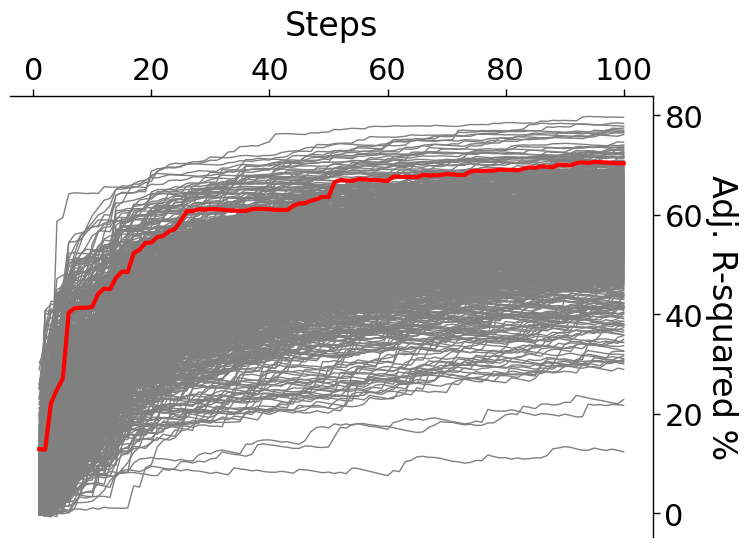

In [22]:
sns.set_context("paper", font_scale = 2.5)
fig, ax = plt.subplots(figsize=(8,6))
for i in range(1000):
  ax.plot(range(1,max_mode+1), corr_variogram[i]*100, lw=1, color='gray')

#actual model
ax.plot(range(1,max_mode+1), corr_raw[9]*100, lw=3, color='red')

ax.set_xlabel('Steps', labelpad=15)
ax.set_ylabel('Adj. R-squared %', rotation=270, labelpad=25)
ax.yaxis.set_label_position("right")
ax.xaxis.set_label_position("top")
ax.yaxis.tick_right()
ax.set_xticks([0,20,40,60,80,100])
ax.xaxis.tick_top()
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.tight_layout()
fig.savefig('../../figures/variogram_fitting_fsLR_mmp.png', transparent=True, dpi=300)

In [23]:
np.where(corr_raw[9][99] > corr_variogram[:,99])[0].shape[0]

965